In [37]:
import numpy as np
from matplotlib import pyplot as plt

In [38]:
A = np.loadtxt("/home/marcim/exampleA.txt")
BF = np.loadtxt("/home/marcim/exampleBF.txt")

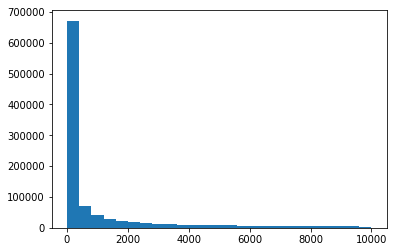

In [39]:
plt.hist(BF, bins=25);

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.


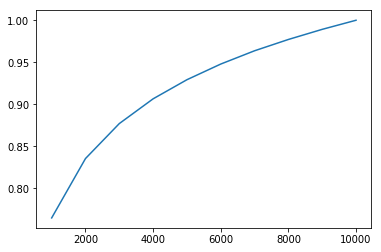

In [40]:
H,X1 = np.histogram(BF, bins = 10, normed = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
plt.plot(X1[1:], F1)
plt.show()

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.


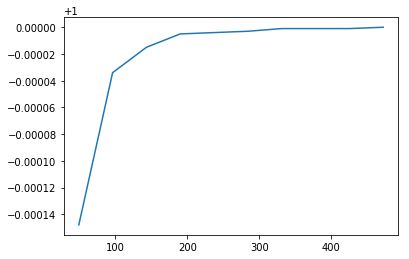

In [32]:
H,X1 = np.histogram(BF, bins = 10, normed = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
plt.plot(X1[1:], F1)
plt.show()

In [15]:
720/2

360.0

In [ ]:
double ZipfGen::H12_(double m, double x){
    double H12_ = (720 * m * x * x * x * x) - ( 360 * s * (m * x * x * x)) + (60 * s * (s + 1) * (m * x * x)) + s * (s + 1) * (s + 2) * (s + 2) * m;
    return H12_;
}